In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse

In [2]:
%matplotlib inline

In [3]:
pwd

'/Users/aditya/Desktop/Datasets'

In [4]:
ratings_data = pd.read_csv('/Users/aditya/Desktop/Datasets/ml-latest-small/ratings.csv')

In [5]:
movies_data = pd.read_csv('/Users/aditya/Desktop/Datasets/ml-latest-small/movies.csv')
tags_data = pd.read_csv('/Users/aditya/Desktop/Datasets/ml-latest-small/tags.csv')

In [6]:
##Overview of Data

In [7]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
tags_data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
#Lets find number of uniques users and movies in our data 

In [11]:
ratings_data.userId.nunique()

610

In [12]:
ratings_data.movieId.nunique()

9724

In [13]:
##At this time, we can disregard the timestamp as it really does not help us

In [14]:
ratings_data = ratings_data[['userId','movieId','rating']]

In [15]:
ratings_data.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [16]:
#Lets check how many movies each user has rated

In [17]:
user_rated_movies = ratings_data.groupby("userId",as_index = False).agg({'movieId':'count'})

In [18]:
user_rated_movies.head()

,userId,movieId
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44


In [19]:
#visualizing the data

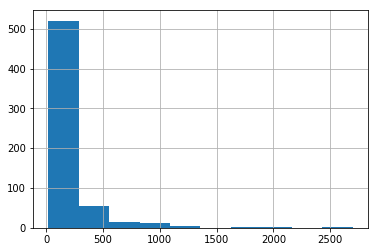

In [20]:
user_rated_movies.movieId.hist()

In [21]:
#Lets get details of each column

In [22]:
user_rated_movies.movieId.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [23]:
user_rated_movies.describe()

,userId,movieId
count,610.000000,610.000000
mean,305.500000,165.304918
std,176.236111,269.480584
min,1.000000,20.000000
25%,153.250000,35.000000
50%,305.500000,70.500000
75%,457.750000,168.000000
max,610.000000,2698.000000


In [24]:
tags_data.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [25]:
#Lets associate movie id with its corresponding name

In [30]:
ratings_data_movie = pd.merge(left=ratings_data, right=movies_data, how='left', on = ['movieId'])

In [31]:
ratings_data_movie.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [32]:
ratings_data_movie_tagged = pd.merge(left=ratings_data_movie, right=tags_data, how='left', on = ['userId','movieId'])

In [33]:
ratings_data_movie_tagged.head()

,userId,movieId,rating,title,genres,tag,timestamp
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,NaN,NaN
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN


In [51]:
ratings_data_movie_tagged.isna().sum()

userId           0
movieId          0
rating           0
title            0
genres           0
tag          99201
timestamp    99201
dtype: int64